<a href="https://colab.research.google.com/github/tharani694/SLC-Project1/blob/main/ML_Supervised_Tharani_CT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Assignment
### DATASET INFORMATION:


Id: ID number

Diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean: mean of distances from center to points on the perimeter

texture_mean: standard deviation of gray-scale values

perimeter_mean: mean size of the core tumor

area_mean: mean of the area

smoothness_mean: mean of local variation in radius lengths

compactness_mean: mean of perimeter^2 / area - 1.0

concavity_mean: mean of severity of concave portions of the contour

concave points_mean: mean for number of concave portions of the contour

symmetry_mean: mean for number of concave portions of the symmetry

fractal_dimension_mean: mean for "coastline approximation" - 1

radius_se: standard error for the mean of distances from center to points on the perimeter

texture_se: standard error for standard deviation of gray-scale values

perimeter_se: standard error for standard deviation of perimeter

area_se: standard error for standard deviation of area

smoothness_se: standard error for local variation in radius lengths

compactness_se: standard error for perimeter^2 / area - 1.0

concavity_se: standard error for severity of concave portions of the contour

concave points_se: standard error for number of concave portions of the contour

symmetry_se: standard error for standard deviation of symmetry

fractal_dimension_se: standard error for "coastline approximation" - 1

radius_worst"worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

perimeter_worst: "worst" or largest mean value for standard deviation of perimeter

area_worst: "worst" or largest mean value for standard deviation of area

smoothness_worst: "worst" or largest mean value for local variation in radius lengths

compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

concave points_worst: "worst" or largest mean value for number of concave portions of the contour

symmetry_worst: "worst" or largest mean value for standard deviation of symmetry

fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" – 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

__1. Read the dataset and print the first five values (1 Mark)__

In [2]:
breast_cancer_dataset = pd.read_csv('/content/data.csv')
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__2. Check and impute the missing values and check the class imbalance. (3 Marks)__

In [3]:
breast_cancer_dataset.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 7
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                  11
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [4]:
## We have null values in radius_se , so we can fill them using fillna
breast_cancer_clean_dataset=breast_cancer_dataset.fillna(breast_cancer_dataset.mean())
breast_cancer_clean_dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
breast_cancer_clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast_cancer_clean_dataset = breast_cancer_clean_dataset.drop(["id"], axis = 1)
breast_cancer_clean_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


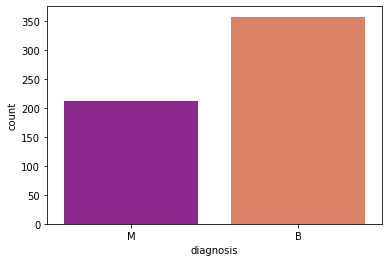

In [7]:
sns.countplot(x="diagnosis", data = breast_cancer_clean_dataset, palette ='plasma')

In [8]:
B, M = breast_cancer_clean_dataset["diagnosis"].value_counts()
print("Class Imbalance")
print("Malignanat: ", M)
print("Bening: ", B)

Class Imbalance
Malignanat:  212
Bening:  357


__3. Convert the Target variable to numerical values (1 Mark)__ 

In [9]:
# breast_cancer_clean_dataset = pd.get_dummies(breast_cancer_clean_dataset['diagnosis'])
# print(breast_cancer_clean_dataset)
# data_frame = pd.DataFrame(breast_cancer_clean_dataset, columns=["diagnosis"])
# # print(data_frame)
 
# # converting to binary data
# df_one = pd.get_dummies(data_frame["diagnosis"])
# # print(df_one)
 
# # display result
# df_two = pd.concat((df_one, data_frame), axis=1)
# df_two = df_two.drop(["diagnosis"], axis=1)
# result = df_two.rename(columns={"M": "diagnosis"})
# result
breast_cancer_clean_dataset
# breast_cancer_clean_dataset.diagnosis = [1 if i == "M" else 0 for i in breast_cancer_clean_dataset.diagnosis]
# breast_cancer_clean_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
breast_cancer_clean_dataset.diagnosis = [1 if i == "M" else 0 for i in breast_cancer_clean_dataset.diagnosis]
breast_cancer_clean_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### 4. Find out the variables which are highly correlated with Target using heatmap and Drop the highly correlated variables(2 Marks)

In [13]:
breast_cancer_cols = breast_cancer_clean_dataset[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

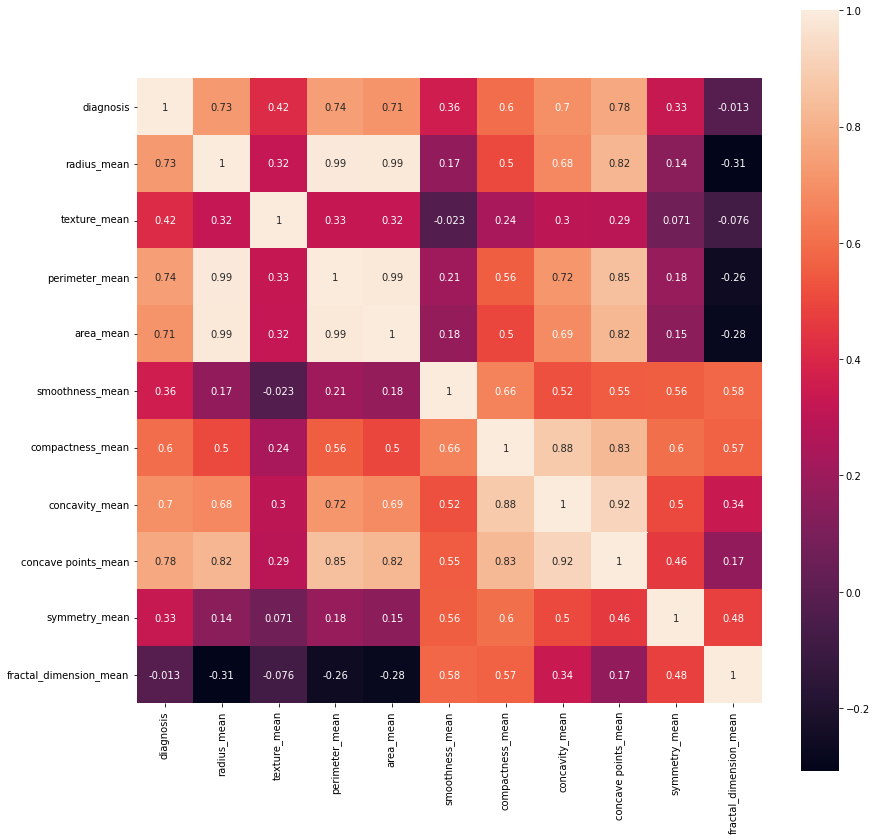

In [14]:
plt.figure(figsize=(14,14))
sns.heatmap(breast_cancer_cols.corr(),vmax=1,annot=True,square=True)

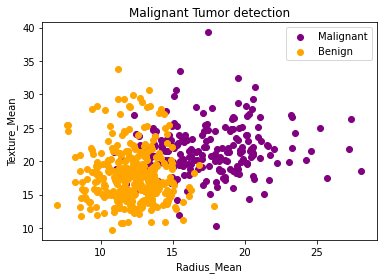

In [18]:
Malignant = breast_cancer_dataset[breast_cancer_dataset.diagnosis == "M"]
Benign = breast_cancer_dataset[breast_cancer_dataset.diagnosis == "B"]
plt.title("Malignant Tumor detection")
plt.xlabel("Radius_Mean")
plt.ylabel("Texture_Mean")
plt.scatter(Malignant.radius_mean, M.texture_mean, color = "purple", label = "Malignant")
plt.scatter(Benign.radius_mean, B.texture_mean, color = "orange", label = "Benign")

plt.legend()
plt.show()

#### 5.Split dataset into train and test (70:30) (1 Mark)__

In [22]:
from sklearn.model_selection import train_test_split
X = breast_cancer_clean_dataset.drop(["diagnosis"], axis = 1)
Y = breast_cancer_clean_dataset.diagnosis.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


__6. Scale the data(1 Mark)__ 

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit(breast_cancer_clean_dataset)
breast_cancer_scaled = model.transform(breast_cancer_clean_dataset)
breast_cancer_scaled

array([[ 1.29767572,  1.09587879, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.83092847, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.58021385,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 1.29767572,  0.69986365,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83947555,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.81867865,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

__7. Fit a random Forest base model and explain the reason of selecting that model. Please write your key observations. (3 marks)__

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100 , random_state = 1)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

__8. Evaluate the model built using Precision, Recall and F1 Score and write the inference about the model results. (3 marks)__

In [26]:
print("Accuracy Score:" , random_forest.score(X_test, Y_test))

Accuracy Score: 0.9707602339181286


In [28]:
from sklearn.metrics import classification_report
Y_pred = random_forest.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Inference:
<br><div>
    The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
</div>
<br>
<div>
We are predicting for Malignant cancer diagnosis with the given dataset and the accuracy score of 97% suggests that Random forest model can be most accurate.
</div>
